# **EDA** #

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

## **1.Load and read basic information of data** ##

In [ ]:
customer_df = pd.read_csv("clean_customer_with_all_indicators.csv")
transaction_df = pd.read_csv("transactions.csv")

# basic information of data
customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939470 entries, 0 to 939469
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   customer_id                       939470 non-null  int64  
 1   residence_country                 939470 non-null  object 
 2   gender                            939470 non-null  int64  
 3   age                               939470 non-null  int64  
 4   first_join_date                   939470 non-null  object 
 5   residence_index                   939470 non-null  object 
 6   channel_entrace                   939470 non-null  object 
 7   activity_status                   939470 non-null  int64  
 8   household_gross_income            939470 non-null  float64
 9   saving_account                    939470 non-null  int64  
 10  guarantees                        939470 non-null  int64  
 11  junior_account                    939470 non-null  i

customer_id residence_country  gender  age first_join_date residence_index  \
0      1375586                ES       0   35      2020-01-12               Y   
1      1050611                ES       0   23      2017-08-10               Y   
2      1050612                ES       0   23      2017-08-10               Y   
3      1050613                ES       1   22      2017-08-10               Y   
4      1050614                ES       0   23      2017-08-10               Y   

  channel_entrace  activity_status  household_gross_income  saving_account  \
0             KHL                1                50887.44               1   
1             KHE                1                30619.38               1   
2             KHE                1                57420.17               0   
3             KHD                1               115661.59               0   
4             KHE                1                28358.36               0   

   ...  total_transactions  active_months  avg_monthly_transaction_count  \
0  ...                15.0           12.0                           1.25   
1  ...                19.0           14.0                           1.36   
2  ...                10.0           10.0                           1.00   
3  ...                21.0           16.0                           1.31   
4  ...                 9.0            8.0                           1.12   

        SPS       TSI  demographic_score  indicator_low_balance  \
0  0.122274  0.485454           0.381798                      0   
1  0.087452  0.201175           0.168332                      0   
2  0.142663  0.633601           0.418683                      0   
3  0.111355  0.541213           0.428340                      0   
4  0.145064  0.539062           0.417684                      0   

   normalized_key_spending_ratio  normalized_transaction_frequency      CCSS  
0                       0.768284                          0.400000  0.387520  
1                       0.583330                          0.514286  0.316487  
2                       0.882126                          0.257143  0.389488  
3                       0.613574                          0.571429  0.403336  
4                       0.359625                          0.228571  0.251470  

[5 rows x 42 columns]

In [ ]:
transaction_df.info()
transaction_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13094522 entries, 0 to 13094521
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   transaction_id    int64  
 1   date              object 
 2   card_id           int64  
 3   amount            float64
 4   transaction_type  object 
 5   merchant_id       int64  
 6   mcc               int64  
 7   card_type         object 
 8   currency          object 
 9   customer_id       int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 999.0+ MB


transaction_id                 date  card_id  amount transaction_type  \
0         7475327  2023-01-31 05:14:27     2972   77.00          Deposit   
1         7475328  2022-10-19 21:17:16     4575   14.57       Withdrawal   
2         7475329  2022-10-21 08:38:02      102   80.00       Withdrawal   
3         7475331  2021-09-02 00:03:08     2860  200.00       Withdrawal   
4         7475332  2021-06-04 02:38:12     3915   46.41       Withdrawal   

   merchant_id   mcc        card_type currency  customer_id  
0        59935  5499  Debit (Prepaid)        £      1138801  
1        67570  5311           Credit        £       262658  
2        27092  4829            Debit        £      1465812  
3        27092  4829            Debit        £      1058646  
4        13051  5813            Debit        £      1152640

## **2.Check for missing values** ##

In [ ]:
print("Missing value situation：")
print(customer_df.isnull().sum())
print(transaction_df.isnull().sum())

Missing value situation：
customer_id                         0
residence_country                   0
gender                              0
age                                 0
first_join_date                     0
residence_index                     0
channel_entrace                     0
activity_status                     0
household_gross_income              0
saving_account                      0
guarantees                          0
junior_account                      0
loans                               0
credit_card                         0
pension                             0
direct_debit                        0
personal_income                     0
number_of_children                  0
employment_status                   0
current_loan_amount                 0
credit_score                        0
customer_segment                    0
min_balance                         0
max_balance                         0
avg_balance                         0
tax_rate                 

## **3.Basic statistical analysis** ##

In [ ]:
print("\nData statistical description: ")
print(customer_df.describe())
print(transaction_df.describe())


Data statistical description: 
        customer_id         gender            age  activity_status  \
count  9.394700e+05  939470.000000  939470.000000    939470.000000   
mean   8.866312e+05       0.399669      39.576985         0.899717   
std    4.499420e+05       0.489831      16.888275         0.300377   
min    1.588900e+04       0.000000      19.000000         0.000000   
25%    4.891502e+05       0.000000      24.000000         1.000000   
50%    9.743460e+05       0.000000      38.000000         1.000000   
75%    1.274764e+06       1.000000      50.000000         1.000000   
max    1.553689e+06       1.000000      99.000000         1.000000   

       household_gross_income  saving_account     guarantees  junior_account  \
count            9.394700e+05   939470.000000  939470.000000   939470.000000   
mean             4.706246e+04        0.449899       0.000020        0.001045   
std              4.444952e+04        0.497484       0.004497        0.032314   
min              

## **4.Customer Data** ##

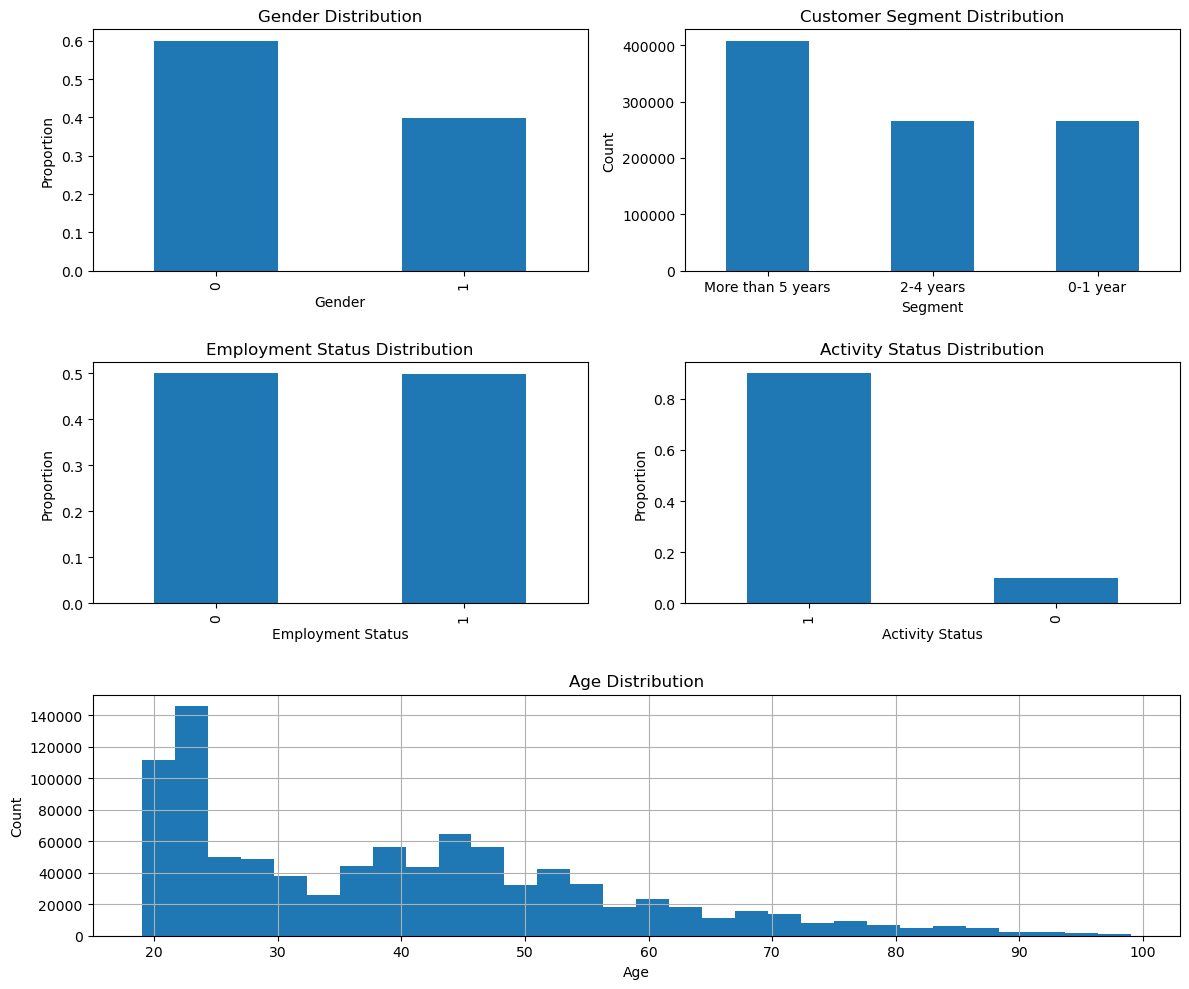

In [ ]:
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

ax0 = fig.add_subplot(gs[0, 0])
customer_df['gender'].value_counts(normalize=True).plot(kind='bar', ax=ax0)
ax0.set_title('Gender Distribution')
ax0.set_xlabel('Gender')
ax0.set_ylabel('Proportion')

ax1 = fig.add_subplot(gs[0, 1])
customer_df['customer_segment'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Customer Segment Distribution')
ax1.set_xlabel('Segment')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2 = fig.add_subplot(gs[1, 0])
customer_df['employment_status'].value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('Employment Status Distribution')
ax2.set_xlabel('Employment Status')
ax2.set_ylabel('Proportion')

ax3 = fig.add_subplot(gs[1, 1])
customer_df['activity_status'].value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('Activity Status Distribution')
ax3.set_xlabel('Activity Status')
ax3.set_ylabel('Proportion')

ax4 = fig.add_subplot(gs[2, :])
customer_df['age'].hist(bins=30, ax=ax4)
ax4.set_title('Age Distribution')
ax4.set_xlabel('Age')
ax4.set_ylabel('Count')

plt.tight_layout(h_pad=2.0)
plt.show()

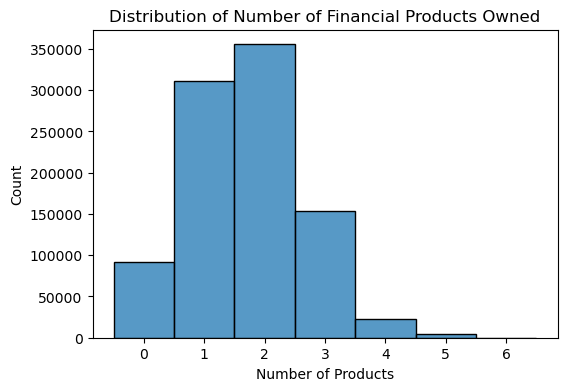

In [ ]:
account_cols = [
    'saving_account', 'guarantees', 'junior_account',
    'loans', 'credit_card', 'pension', 'direct_debit'
]
customer_df['account_count'] = customer_df[account_cols].sum(axis=1)

plt.figure(figsize=(6, 4))
sns.histplot(customer_df['account_count'], bins=range(0, 9), discrete=True)
plt.title("Distribution of Number of Financial Products Owned")
plt.xlabel("Number of Products")
plt.show()

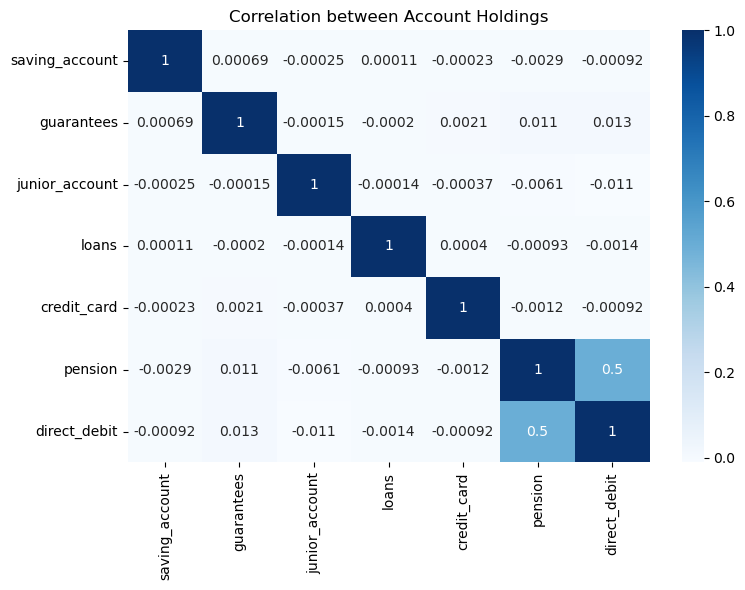

In [ ]:
corr_matrix = customer_df[account_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation between Account Holdings")
plt.tight_layout()
plt.show()

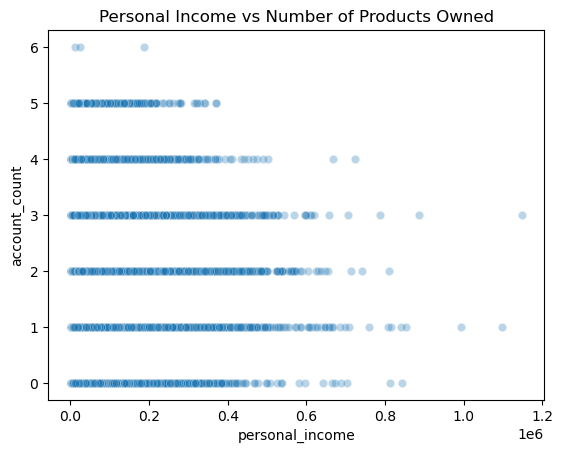

In [ ]:
sns.scatterplot(data=customer_df, x='personal_income', y='account_count', alpha=0.3)
plt.title("Personal Income vs Number of Products Owned")
plt.show()

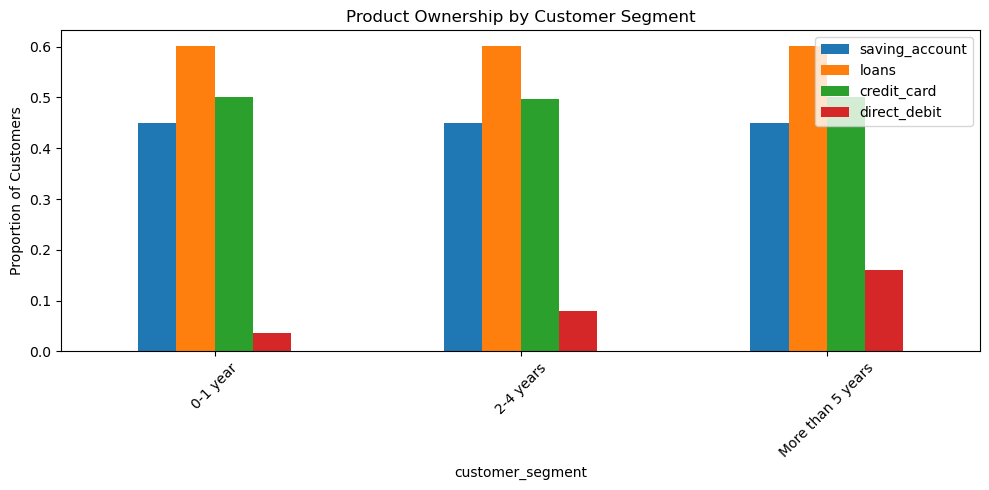

In [ ]:
segment_group = customer_df.groupby('customer_segment')[[
    'saving_account', 'loans', 'credit_card', 'direct_debit'
]].mean()

segment_group.plot(kind='bar', figsize=(10,5))
plt.title("Product Ownership by Customer Segment")
plt.ylabel("Proportion of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

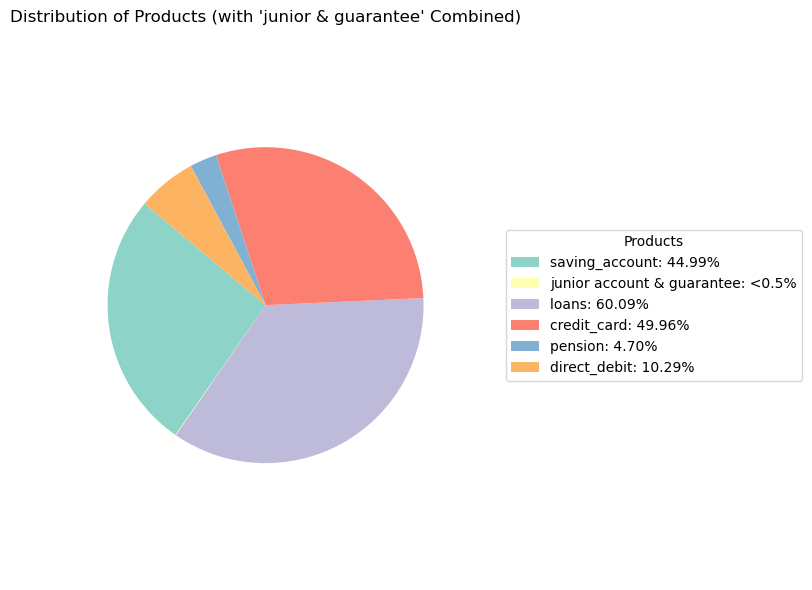

In [ ]:
original_cols = [
    'saving_account', 'guarantees', 'junior_account',
    'loans', 'credit_card', 'pension', 'direct_debit'
]

customer_df[original_cols] = customer_df[original_cols].astype(int)

customer_df['junior account & guarantee'] = customer_df['junior_account'] | customer_df['guarantees']  # 只要有一个就记为1

new_cols = [
    'saving_account', 'junior account & guarantee', 'loans',
    'credit_card', 'pension', 'direct_debit'
]

product_distribution = customer_df[new_cols].mean() * 100
labels = [
    f"{label}: {val:.2f}%" if val >= 0.5 else f"{label}: <0.5%"
    for label, val in zip(product_distribution.index, product_distribution)
]
colors = plt.cm.Set3.colors
explode = [0.1 if val < 1 else 0 for val in product_distribution]

plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(product_distribution,
                        startangle=140,
                        explode=explode,
                        colors=colors)

plt.legend(wedges, labels, title="Products", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Products (with 'junior & guarantee' Combined)")
plt.axis('equal')
plt.tight_layout()
plt.show()

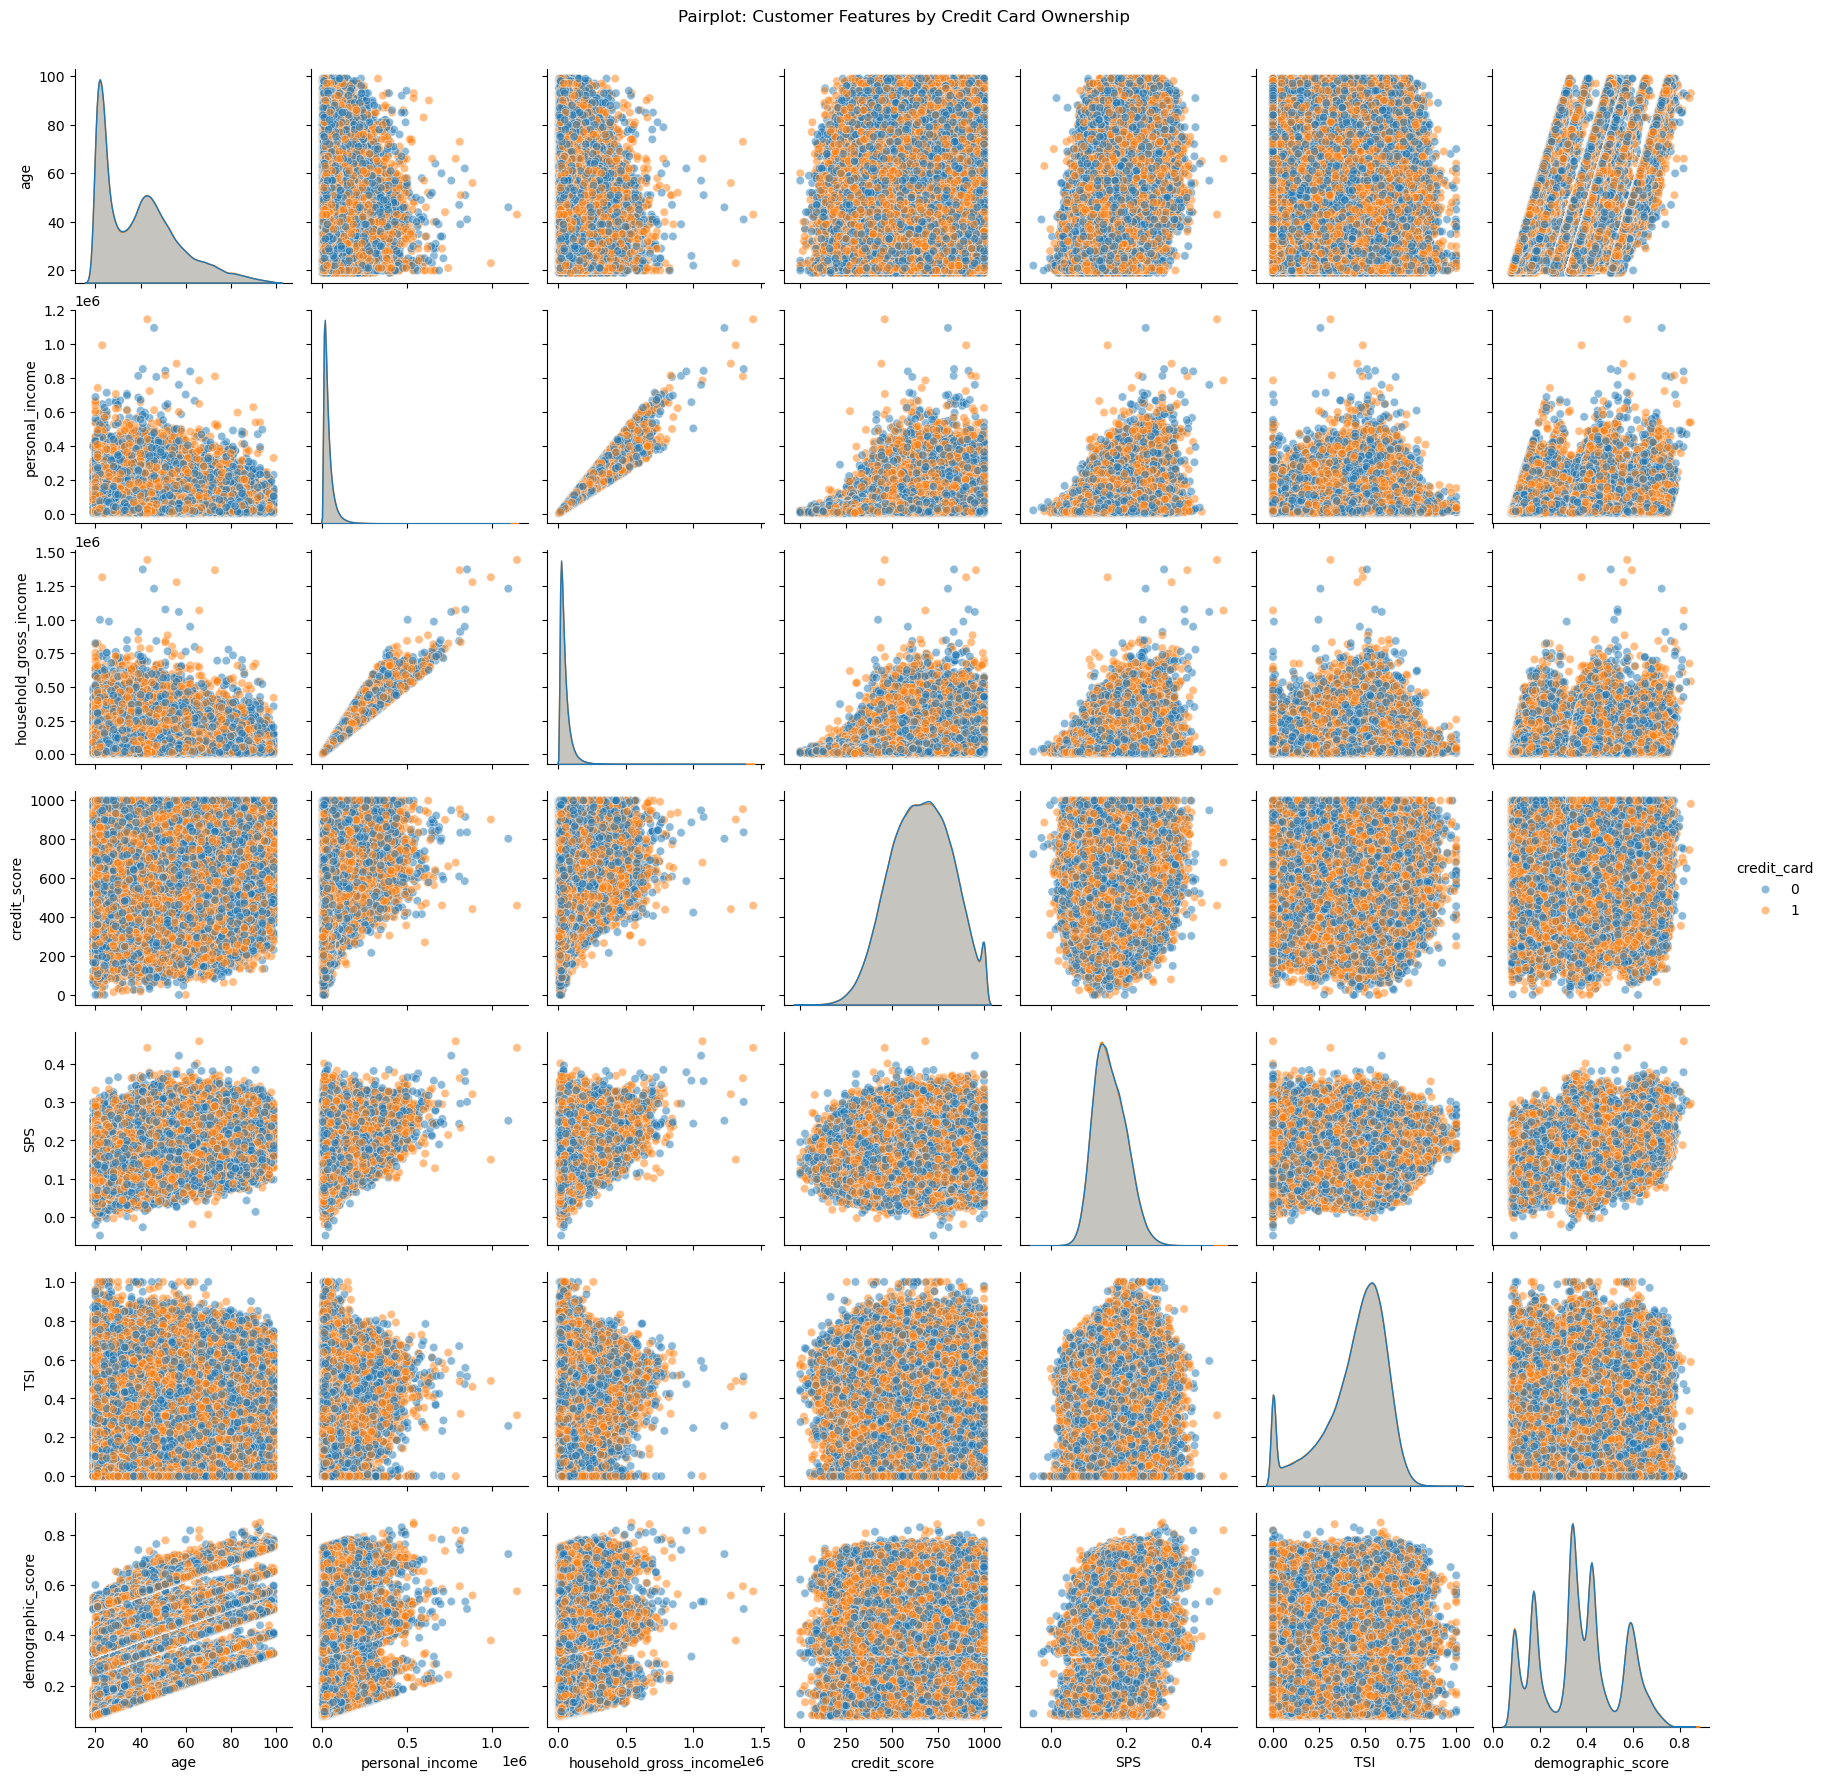

In [ ]:
cols = [
    'age', 'personal_income', 'household_gross_income',
    'credit_score', 'SPS', 'TSI', 'demographic_score'
]

customer_df['credit_card'] = customer_df['credit_card'].astype('category')


sns.pairplot(customer_df[cols + ['credit_card']],
             hue='credit_card', diag_kind='kde',
             plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot: Customer Features by Credit Card Ownership", y=1.02)
plt.show()


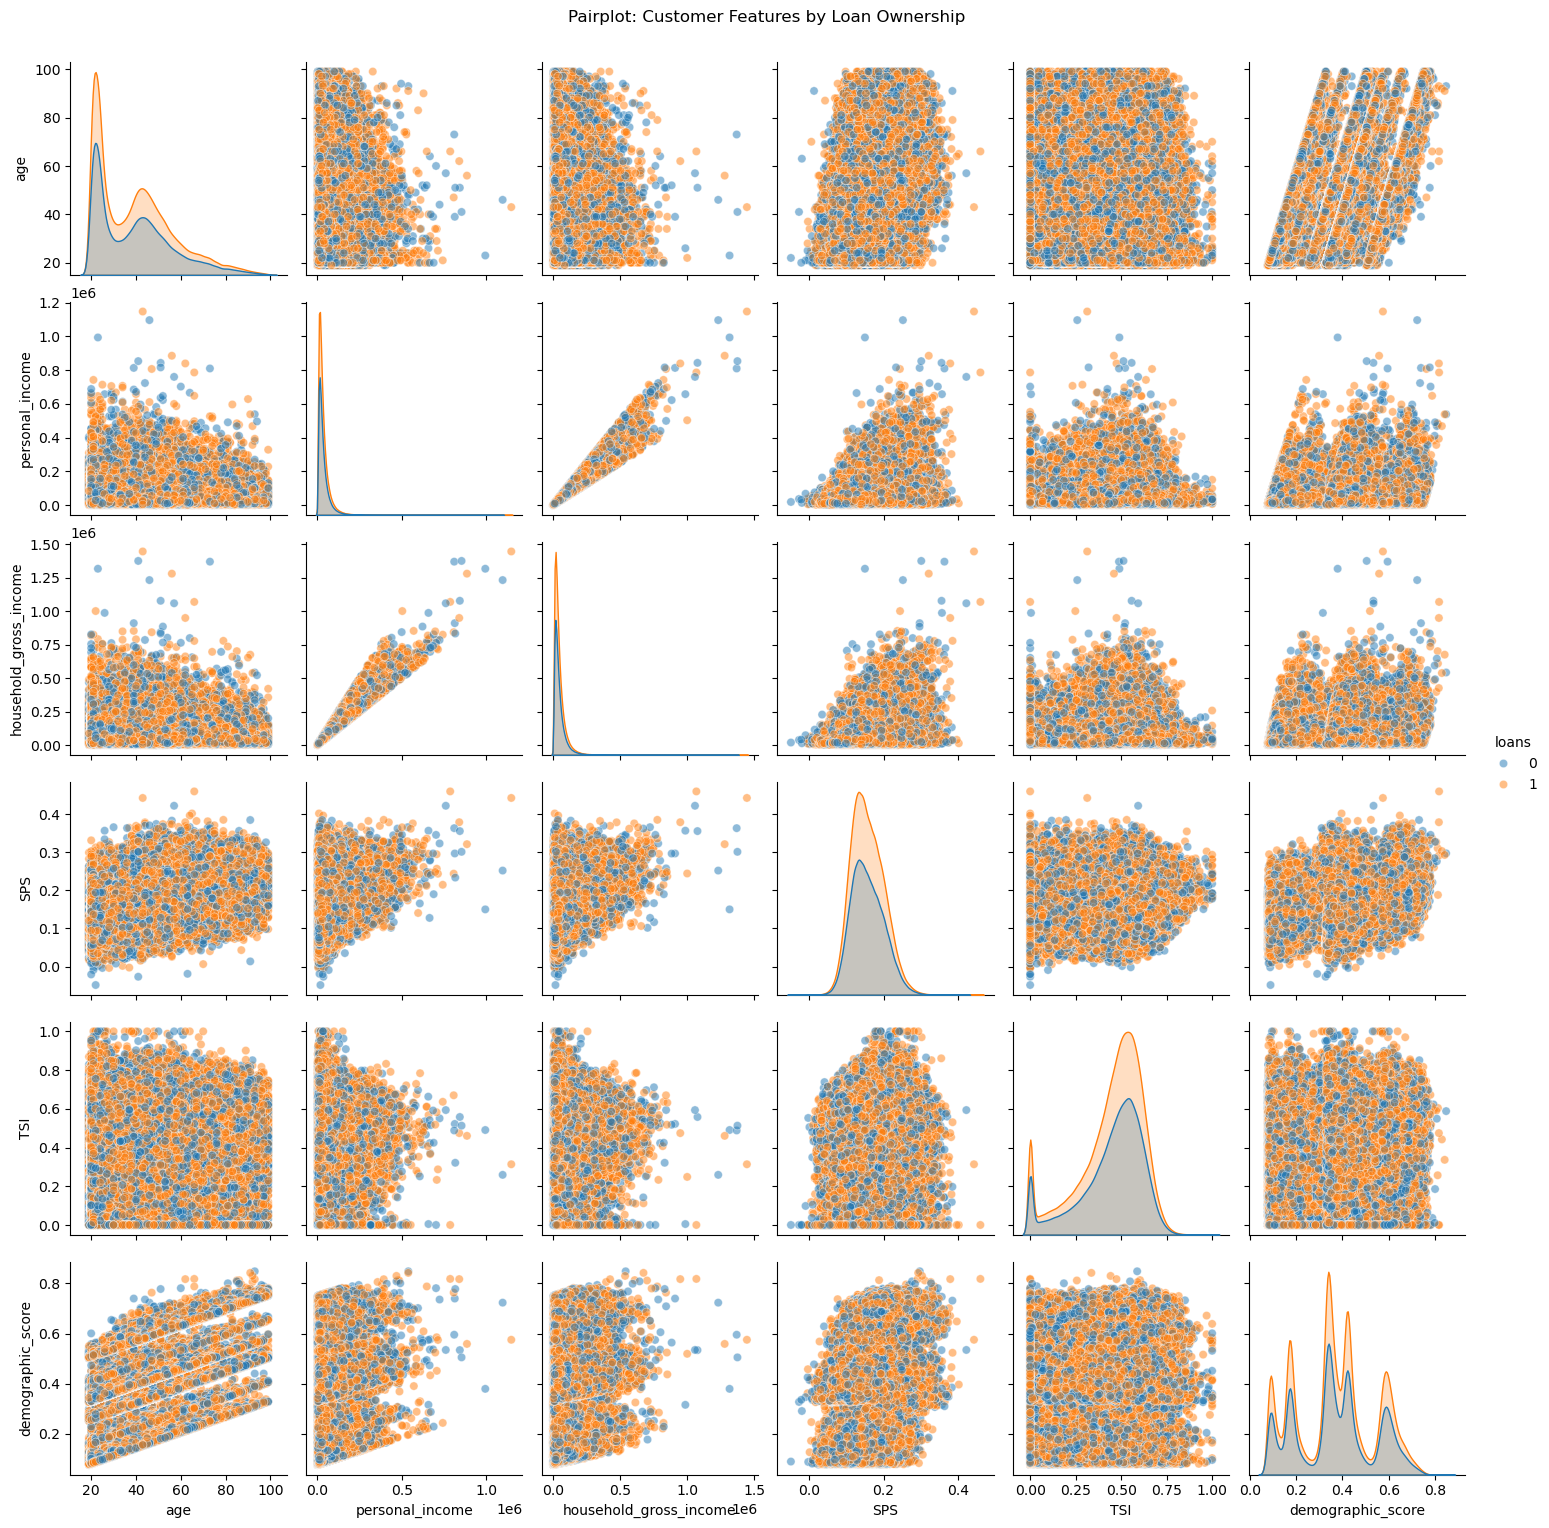

In [ ]:
cols = [
    'age', 'personal_income', 'household_gross_income',
    'SPS', 'TSI', 'demographic_score'
]

customer_df['loans'] = customer_df['loans'].astype('category')

sns.pairplot(customer_df[cols + ['loans']],
             hue='loans', diag_kind='kde',
             plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot: Customer Features by Loan Ownership", y=1.02)
plt.show()


## **5.Transaction Data** ##

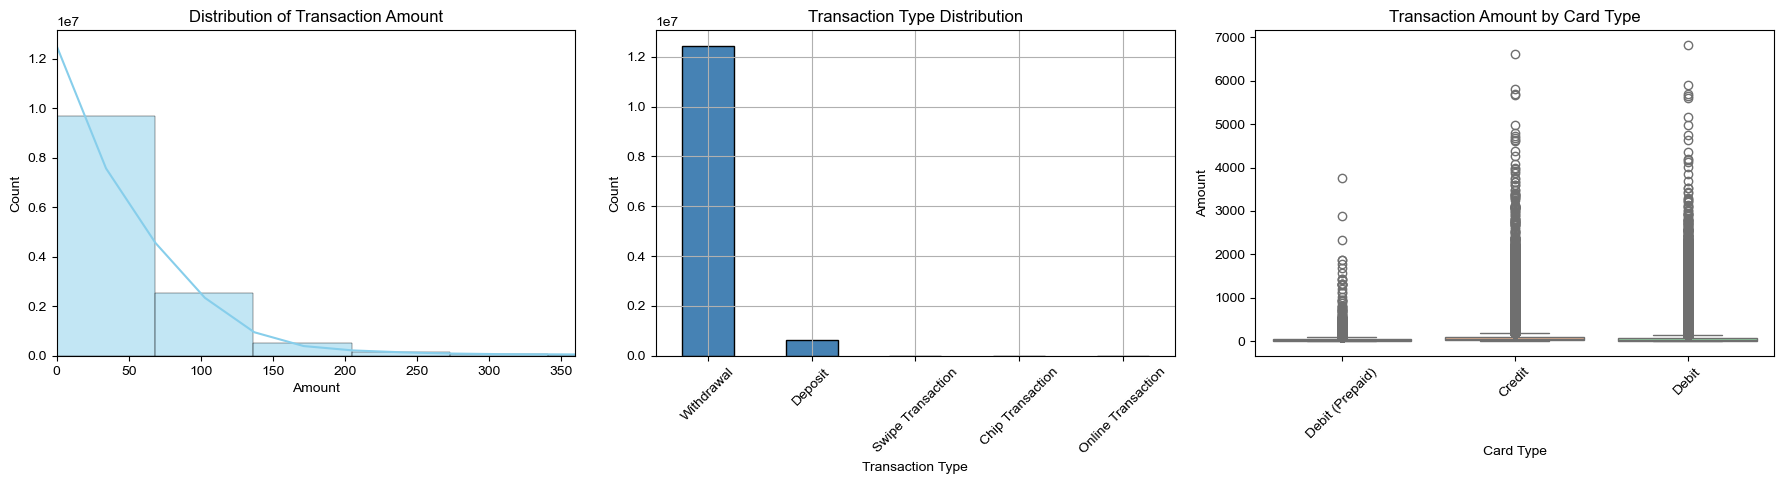

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.set(style="whitegrid")

sns.histplot(transaction_df['amount'], bins=100, kde=True, ax=axs[0], color='skyblue', edgecolor='black')
axs[0].set_xlim(0, transaction_df['amount'].quantile(0.99))
axs[0].set_title("Distribution of Transaction Amount")
axs[0].set_xlabel("Amount")
axs[0].set_ylabel("Count")

transaction_df['transaction_type'].value_counts().plot(
    kind='bar', ax=axs[1], color='steelblue', edgecolor='black'
)
axs[1].set_title("Transaction Type Distribution")
axs[1].set_xlabel("Transaction Type")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=45)

sns.boxplot(
    data=transaction_df,
    x='card_type',
    y='amount',
    hue='card_type',
    palette='pastel',
    ax=axs[2],
    legend=False
)
axs[2].set_title("Transaction Amount by Card Type")
axs[2].set_xlabel("Card Type")
axs[2].set_ylabel("Amount")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


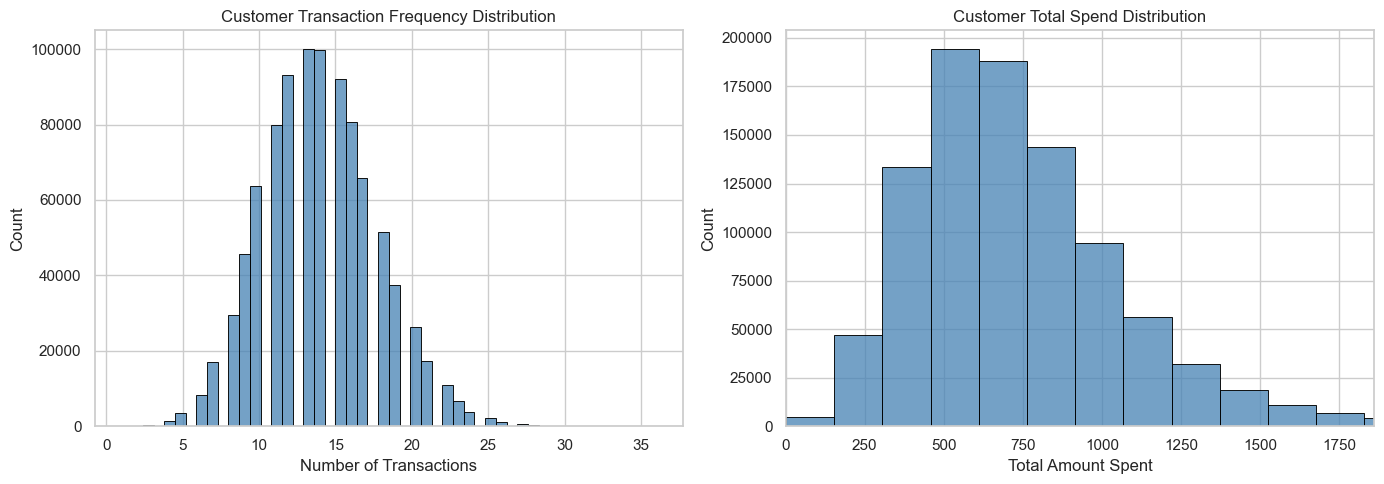

In [ ]:
trans_agg = transaction_df.groupby('customer_id').agg(
    transaction_count=('transaction_id', 'count'),
    total_amount=('amount', 'sum')
).reset_index()

sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(
    trans_agg['transaction_count'],
    bins=50,
    ax=axes[0],
    color='steelblue',
    edgecolor='black'
)
axes[0].set_title("Customer Transaction Frequency Distribution", fontsize=12)
axes[0].set_xlabel("Number of Transactions")
axes[0].set_ylabel("Count")

sns.histplot(
    trans_agg['total_amount'],
    bins=50,
    ax=axes[1],
    color='steelblue',
    edgecolor='black'
)
axes[1].set_title("Customer Total Spend Distribution", fontsize=12)
axes[1].set_xlabel("Total Amount Spent")
axes[1].set_ylabel("Count")
axes[1].set_xlim(0, trans_agg['total_amount'].quantile(0.99))  # 去掉极端值影响显示

plt.tight_layout()
plt.show()

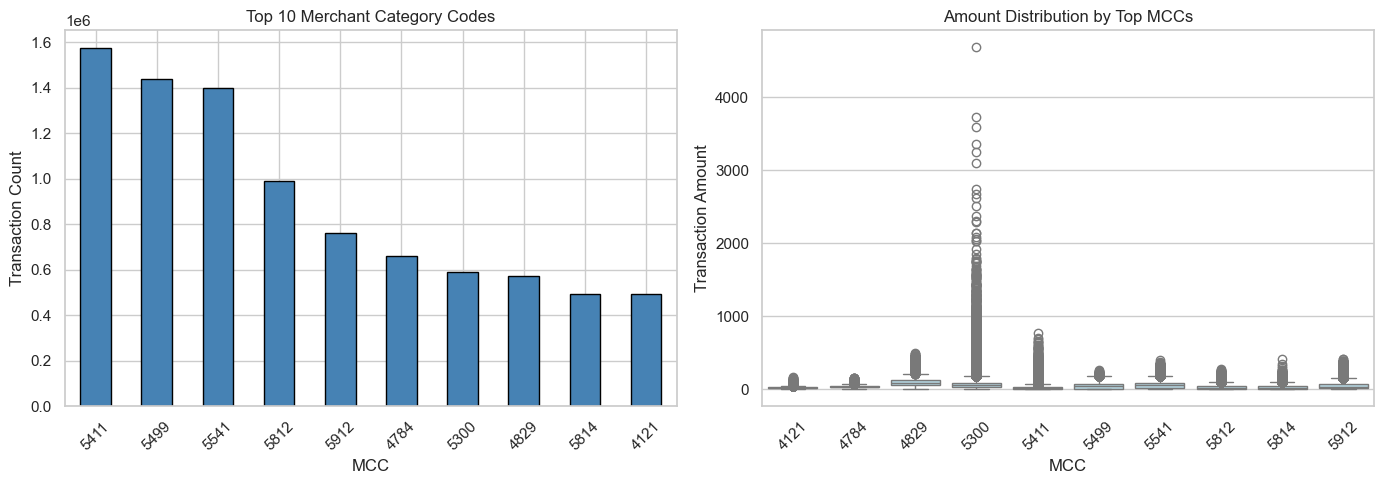

In [ ]:
top_mcc = transaction_df['mcc'].value_counts().head(10)
top_mcc_ids = top_mcc.index.tolist()
mcc_subset = transaction_df[transaction_df['mcc'].isin(top_mcc_ids)]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

top_mcc.plot(kind='bar', ax=axs[0], color='steelblue', edgecolor='black')
axs[0].set_title('Top 10 Merchant Category Codes')
axs[0].set_ylabel('Transaction Count')
axs[0].set_xlabel('MCC')
axs[0].tick_params(axis='x', rotation=45)

sns.boxplot(daa=mcc_subset, x='mcc', y='amount', ax=axs[1], color='lightblue')
axs[1].set_title('Amount Distribution by Top MCCs')
axs[1].set_xlabel('MCC')
axs[1].set_ylabel('Transaction Amount')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


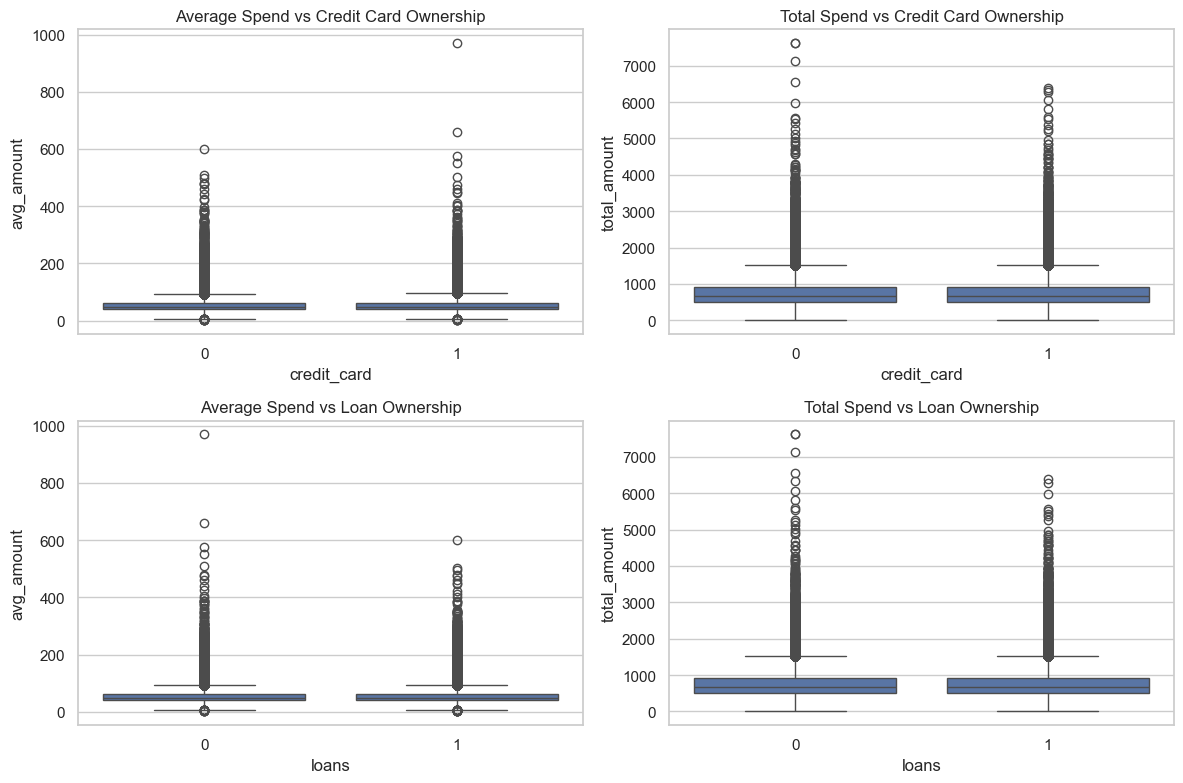

In [ ]:
trans_agg = transaction_df.groupby('customer_id').agg(
    avg_amount=('amount', 'mean'),
    total_amount=('amount', 'sum')
).reset_index()
merged = pd.merge(customer_df, trans_agg, on='customer_id', how='inner')

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(data=merged, x='credit_card', y='avg_amount', ax=axes[0, 0])
axes[0, 0].set_title("Average Spend vs Credit Card Ownership")

sns.boxplot(data=merged, x='credit_card', y='total_amount', ax=axes[0, 1])
axes[0, 1].set_title("Total Spend vs Credit Card Ownership")

sns.boxplot(data=merged, x='loans', y='avg_amount', ax=axes[1, 0])
axes[1, 0].set_title("Average Spend vs Loan Ownership")

sns.boxplot(data=merged, x='loans', y='total_amount', ax=axes[1, 1])
axes[1, 1].set_title("Total Spend vs Loan Ownership")

plt.tight_layout()
plt.show()